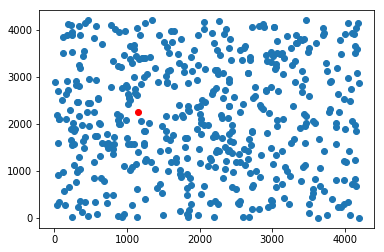

In [65]:
from scipy.stats import norm, uniform
import numpy as np
import matplotlib.pyplot as plt
from draw_sky2 import draw_sky

np.set_printoptions(suppress=True)

data = uniform.rvs(loc=0.0, scale=4200, size=[500, 2])
halo_position = uniform.rvs(loc=0.0, scale=4200, size=[1, 2])

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(halo_position[:, 0], halo_position[:, 1], c="r")
plt.show()

In [66]:
def f_dist(gxy_pos, halo_pos):
    return np.sqrt(((gxy_pos - halo_pos)**2)).sum(axis=1)[:, None]

def tangential_dist(glxy_position, halo_position):
    delta = glxy_position - halo_position
    t = (2*np.arctan(delta[:,1]/delta[:,0]))
    return np.stack([-np.cos(t), -np.sin(t)], axis=1)

mass_large = 167.02548341278867
ellpty = mass_large / f_dist(data[:, :2], halo_position) * tangential_dist(data[:, :2], halo_position)
ellpty = norm.rvs(loc=ellpty, scale=0.05)

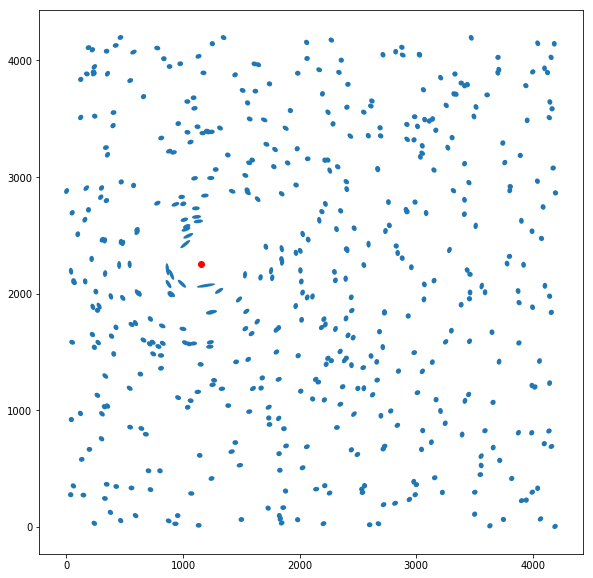

In [69]:
test_data = np.concatenate((data[:, 0:2], ellpty), axis=1)
draw_sky(test_data)
plt.scatter(halo_position[:, 0], halo_position[:, 1], c="r")